# Neuronale Netze

Dieses Notebook ist Teil des Projekts [EmbedML](https://hahn-schickard.gitbook.io/embedml) und basiert auf den Inhalten des Kapitels [Neuronale Netze](https://hahn-schickard.gitbook.io/embedml/2_ml/2.8_neuronale_netze). Es ist auf [Colab](https://colab.research.google.com/drive/1OBQLigbM92-jRft786DHBllTPMR44-0w?usp=sharing) und im [GitHub-Repository von Hahn-Schickard](https://github.com/Hahn-Schickard/EmbedML/blob/master/src/Neuronale_Netze.ipynb) zu finden.

Installation der benötigten Bibliotheken in den angegebenen Versionen.

In [1]:
!pip install -q scikit-learn==1.5.2 pandas==2.2.2 tensorflow==2.17.0 tensorflow-datasets==4.9.7 matplotlib==3.8.0 numpy==1.26.4 > /dev/null 2>&1

Das System kann den angegebenen Pfad nicht finden.


Laden der benötigten Bibliotheken.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.models import Sequential

### Modellarchitekturen

#### Mehrlagiges Perzeptron (engl. Multilayer Perceptron, MLP)

Der Iris-Datensatz wird geladen und in Trainings-, Validierungs-, und Testdaten aufgeteilt.

In [3]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['Species'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

Mit der `StandardScaler`-Klasse von `sklearn` lassen sich die Datenmerkmale normalisieren, sodass kein Merkmal durch große oder kleine Werte das Netzwerk unverhältnismäßig beeinflusst.

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


Ein Modell wird in TensorFlow erstellt, das aus drei vollvernetzten Schichten besteht: Die erste Schicht ist die Eingabeschicht mit festgelegter `input_shape`, basierend auf der Merkmalanzahl der Trainingsdaten. `ReLU` wird als Aktivierungsfunktion für die versteckten Schichten genutzt, `Softmax` für die Ausgabeschicht. Die Softmax-Funktion stellt sicher, dass die Ausgabewerte sich zu 1 summieren – geeignet für Klassifizierungsaufgaben.

In [5]:
model = tf.keras.Sequential()

model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation="softmax"))

Die `summary()`-Funktion gibt eine detaillierte Beschreibung des Modells aus. Im Iris-Datensatz mit 4 Merkmalen und einem Bias ergibt sich in der ersten Schicht mit 128 Neuronen die Parameteranzahl zu $(4 \times 128 + 128 = 640)$. Diese 128 Neuronen sind vollständig mit den 64 Neuronen der nächsten Schicht verknüpft, was $(128 \times 64 + 64 = 8.256)$ Parameter ergibt. Für die letzten Schicht ergeben sich dementsprechen 195 Neuronen $(64 \times 3 + 3 = 195)$

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 9,091
Trainable params: 9,091
Non-trainable params: 0
_________________________________________________________________


Als Nächstes wird das Modell kompiliert. Mit dem Parameter `optimizer='adam'` werden verschiedene Hyperparameter übergeben. Das Verfahren Adam ist ein stochastisches Gradientenabstiegsverfahren. Mit dem Parameter `loss` wird festgelegt, welche Loss-Funktion verwendet werden soll und mit `metrics=['accuracy']` wird angegeben, welche Metriken beim Training angegeben werden sollen.

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 1
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/10
52/52 [==============================] - 6s 16ms/step - loss: 0.8139 - accuracy: 0.6538 - val_loss: 0.5943 - val_accuracy: 0.7736
Epoch 2/10
52/52 [==============================] - 0s 8ms/step - loss: 0.4090 - accuracy: 0.8654 - val_loss: 0.4028 - val_accuracy: 0.8491
Epoch 3/10
52/52 [==============================] - 0s 8ms/step - loss: 0.2789 - accuracy: 0.8846 - val_loss: 0.3405 - val_accuracy: 0.8491
Epoch 4/10
52/52 [==============================] - 0s 8ms/step - loss: 0.2194 - accuracy: 0.9231 - val_loss: 0.3375 - val_accuracy: 0.8302
Epoch 5/10
52/52 [==============================] - 0s 7ms/step - loss: 0.1663 - accuracy: 0.9423 - val_loss: 0.2817 - val_accuracy: 0.8679
Epoch 6/10
52/52 [==============================] - 0s 7ms/step - loss: 0.1227 - accuracy: 1.0000 - val_loss: 0.2794 - val_accuracy: 0.8679
Epoch 7/10
52/52 [==============================] - 0s 8ms/step - loss: 0.0967 - accuracy: 1.0000 - val_loss: 0.2516 - val_accuracy: 0.8679
Epoch 8/10
52/52 [=

Zum Schluss wird mithilfe des Test-Datensatzes überprüft, wie das Modell auf bisher ungesehene Daten performt. Dies wird durch eine Konfusionsmatrix veranschaulicht.

2/2 [==============================] - 0s 0s/step


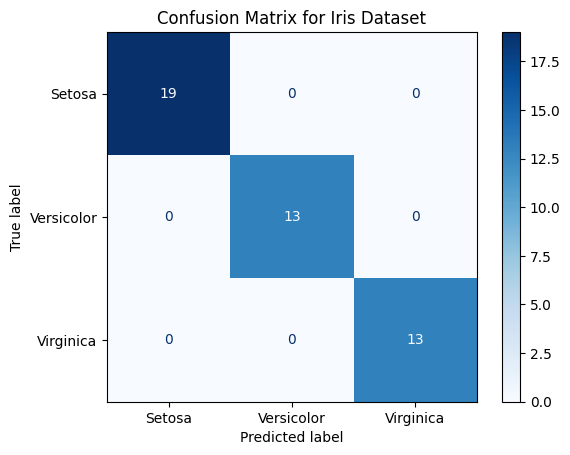

In [8]:
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)  # Die Klasse mit der höchsten Wahrscheinlichkeit auswählen

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Setosa", "Versicolor", "Virginica"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix for Iris Dataset")
plt.show()

### Convolutional Neural Network (CNN)

Dieses Beispiel ist angelehnt an das Tutorial von [TensorFlow](https://www.tensorflow.org/tutorials/images/cnn).

Der CIFAR10 Datensatz wird importiert und die Bilder normalisiert.

In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

Hier werden einige Bilder des Datensatzes visualisiert.

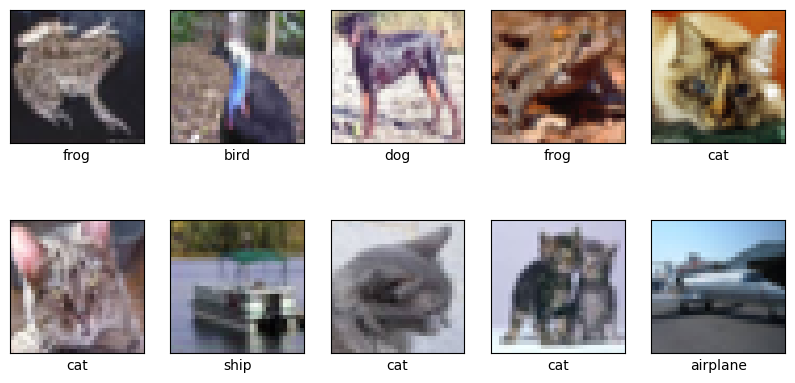

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Nachdem die Daten geladen, normalisiert und geplottet wurden, kann das Modell erzeugt werden. Hier werden nun nichtmehr nur "Dense"-Schichten verwendet sondern "Convolution"-Schichten und "MaxPooling"-Schichten verwendet.

Convolutional Layers:
Diese Schichten verwenden Filter (kleine Fenster), die über das Bild gleiten und lokale Merkmale wie Kanten, Ecken und Texturen extrahieren.
Dadurch kann das Modell hierarchische Merkmale lernen, die wichtig für die Klassifikation sind.

MaxPooling Layers:
Diese Schichten reduzieren die räumliche Größe der Merkmalskarten, indem sie nur den größten Wert aus jeder Region (z.B. 2x2 Fenster) übernehmen.
Dies reduziert die Anzahl der Parameter und die Berechnungsmenge im Netzwerk und hilft, Überanpassung zu vermeiden. Des weiteren helfen sie dabei das Modell herunter zu brechen bis in der Output Schicht nurnoch 10 Output-Werte existieren.

In [11]:
# CNN Modell erstellen
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(10)
])

Über die Zusammenfassung kann betrachtet werden wieviele Parameter in dem Modell an den verschiedenen Schichten existieren.

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

Folgender Code kompiliert das Modell mit dem `Adam-Optimierer` und der Verlustfunktion `Sparse Categorical Crossentropy`, um die Klassifikationsfehler zu minimieren. Anschließend wird die Metrik `'accuracy'` verwendet, um die Genauigkeit des Modells zu bewerten. Danach wird das Modell für 10 Epochen auf den Trainingsdaten trainiert und dabei die Validierungsdaten zur Bewertung der Leistung genutzt.

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(val_images, val_labels))

Epoch 1/10
1250/1250 [==============================] - 14s 6ms/step - loss: 1.5613 - accuracy: 0.4355 - val_loss: 1.3094 - val_accuracy: 0.5294
Epoch 2/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.2190 - accuracy: 0.5666 - val_loss: 1.1357 - val_accuracy: 0.6006
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0798 - accuracy: 0.6226 - val_loss: 1.1488 - val_accuracy: 0.5978
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9852 - accuracy: 0.6563 - val_loss: 1.0005 - val_accuracy: 0.6482
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9128 - accuracy: 0.6819 - val_loss: 0.9690 - val_accuracy: 0.6637
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8530 - accuracy: 0.7022 - val_loss: 0.9145 - val_accuracy: 0.6851
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.8032 - accuracy: 0.7202 - val_loss: 0.9049 - val_accuracy

Nachdem das Modell trainiert wurde wird die Genauigkeit des Validierungs-Datensatzes und des Trainingsdatensatzes ausgegeben.

313/313 - 1s - loss: 0.8917 - accuracy: 0.6959 - 724ms/epoch - 2ms/step


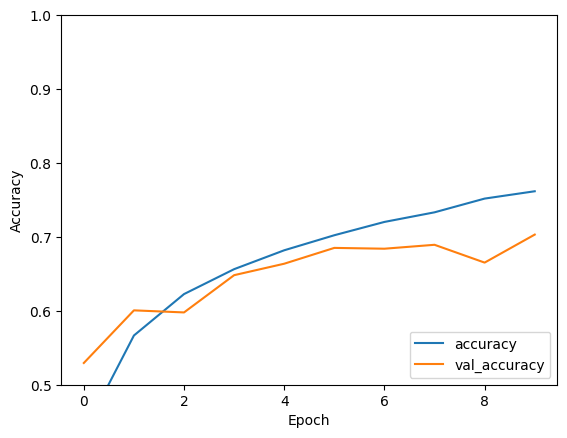

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Die minimale Differenz zwischen Trainings- und Validierungsgenauigkeit zeigt, dass das Modell gut generalisiert und keine starke Überanpassung auf die Trainingsdaten aufweist, was auf eine robuste Leistung auf neuen Daten hindeutet. Nachdem das Modell trainiert und die Genauigkeiten ausgegeben wurde kann der Test-Datensatz verwendet werden um mit der Modell Vorhersagen zu den Daten zu treffen.

In [15]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Die Vorhersagen ermöglichen das Labeln der Bilder. Zufällige Testbilder werden mit den vorhergesagten Labels versehen, wobei einige Fehlklassifikationen erkennbar sind. Zur Verbesserung könnten zusätzliche Convolutional-Schichten oder alternative Architekturen getestet werden.

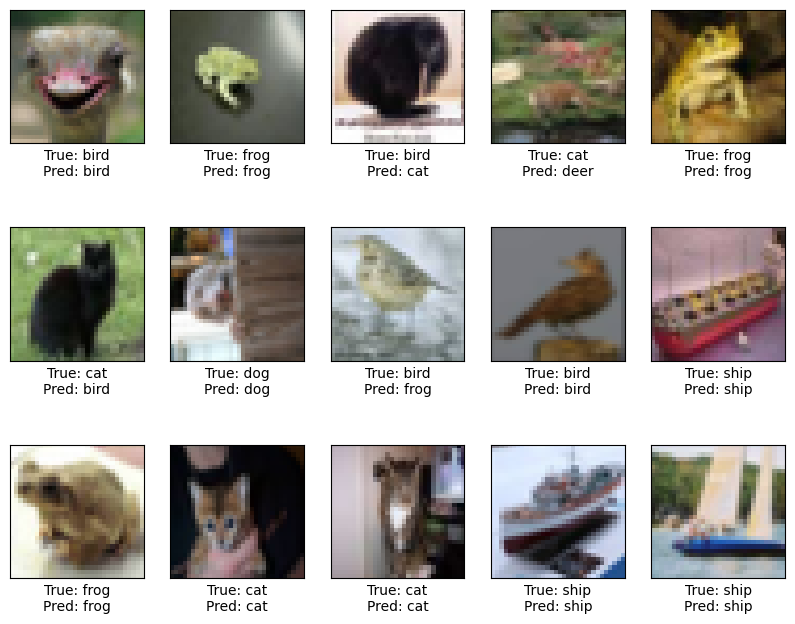

In [16]:
# Funktion um Bilder mit vorhergesagten und tatsächlichen Labels anzuzeigen
def plot_random_images(images, labels, predictions, class_names):
    plt.figure(figsize=(10, 8))
    random_indices = np.random.choice(len(images), 15, replace=False)
    for i, idx in enumerate(random_indices):
        plt.subplot(3, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[idx])
        true_label = class_names[labels[idx][0]]
        predicted_label = class_names[np.argmax(predictions[idx])]
        plt.xlabel(f'True: {true_label}\nPred: {predicted_label}')
    plt.show()

plot_random_images(test_images, test_labels, predictions, class_names)

#### Generative Adversarial Networks (GANs)






Dieses einfache GAN-Modell ist auf die Generierung einzelner numerischer Werte ausgelegt. Das ist eine unübliche Anwendung, die hier jedoch gewählt wurde, um eine schnelle Ausführung zu ermöglichen, da GANs normalerweise für komplexere, mehrdimensionale Daten wie Bilder oder Audiodaten eingesetzt werden.

Setzt zufällige Seeds für `TensorFlow` und `NumPy`, um reproduzierbare Ergebnisse zu gewährleisten.

In [17]:
tf.random.set_seed(42)
np.random.seed(42)

Wichtige Hyperparameter einstellen: `latent_dim` für die Größe des Rauschvektors, `batch_size` und `learning_rate` für das Training und `epochs` für die Trainingsdauer.

In [18]:
latent_dim = 5
batch_size = 16
learning_rate = 0.0002
epochs = 50

Definition einer Funktion zur Erzeugung realer Daten aus einer Gauß-Verteilung, die für das Training des Diskriminators verwendet wird.


In [19]:
def generate_real_data(n):
    return np.random.normal(0, 1, (n, 1))

Erstellung eines Generatormodells, das gefälschte Daten aus Zufallsrauschen erzeugt.

In [20]:
def build_generator():
    model = models.Sequential([
        layers.Dense(16, activation="relu", input_dim=latent_dim),
        layers.BatchNormalization(),
        layers.Dense(32, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(1)
    ])
    return model

Aufbau eines Diskriminator-Modells, das echte von gefälschten Daten unterscheidet.

In [21]:
def build_discriminator():
    model = models.Sequential([
        layers.Dense(64, activation="relu", input_shape=(1,)),
        layers.BatchNormalization(),
        layers.Dense(32, activation="relu"),
        layers.BatchNormalization(),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(learning_rate))
    return model


Kombination von Generator und Diskriminator zu einem einzigen GAN-Modell, wobei der Diskriminator während des Trainings des Generators eingefroren wird.


In [22]:
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan = models.Sequential([generator, discriminator])
    gan.compile(loss="binary_crossentropy", optimizer=optimizers.Adam(learning_rate))
    return gan

Training des GAN durch:
- Training des Diskriminators mit echten und gefälschten Daten.
- Rauschen wird in das GAN gegeben. Aufzeichnung der Verluste für den Diskriminator und den Generator und deren Ausgabe alle 50 Epochen.

1/1 [==============================] - 0s 67ms/step
Epoch 0, D Loss Real: 0.7851109504699707, D Loss Fake: 0.7945109605789185, G Loss: 0.5985244512557983
1/1 [==============================] - 0s 18ms/step


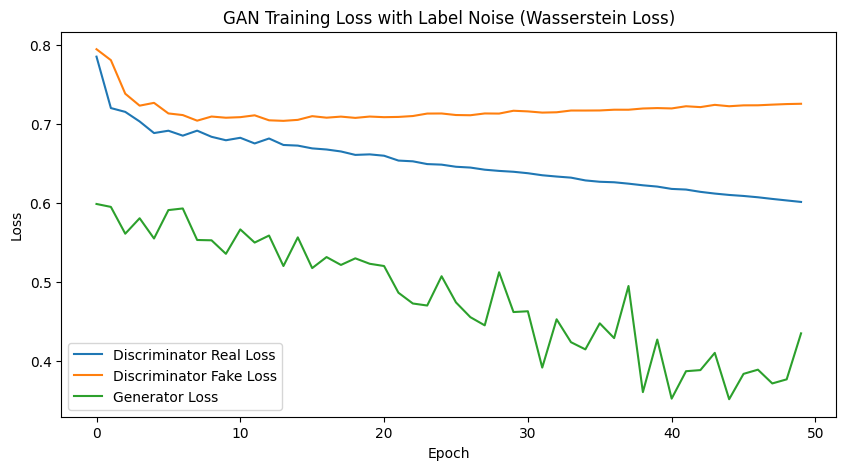

In [23]:
def train_gan(epochs, batch_size):
    generator = build_generator()
    discriminator = build_discriminator()
    gan = build_gan(generator, discriminator)

    d_loss_real, d_loss_fake, g_loss = [], [], []

    for epoch in range(epochs):
        # Train discriminator with real data (Wasserstein loss)
        real_samples = generate_real_data(batch_size)
        d_loss_real_epoch = discriminator.train_on_batch(real_samples, -np.ones((batch_size, 1)))  # Real samples labeled as -1

        # Train discriminator with fake data (Wasserstein loss)
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_samples = generator.predict(noise)
        d_loss_fake_epoch = discriminator.train_on_batch(fake_samples, np.ones((batch_size, 1)))  # Fake samples labeled as 1

        # Train generator (via the GAN model, where discriminator weights are frozen)
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss_epoch = gan.train_on_batch(noise, -np.ones((batch_size, 1)))  # Generator tries to fool the discriminator

        # Record losses
        d_loss_real.append(d_loss_real_epoch)
        d_loss_fake.append(d_loss_fake_epoch)
        g_loss.append(g_loss_epoch)

        # Print losses for every 50th epoch
        if epoch % 50 == 0:
            print(f"Epoch {epoch}, D Loss Real: {d_loss_real_epoch}, D Loss Fake: {d_loss_fake_epoch}, G Loss: {g_loss_epoch}")

    # Plotting the losses
    plt.figure(figsize=(10, 5))
    plt.plot(d_loss_real, label="Discriminator Real Loss")
    plt.plot(d_loss_fake, label="Discriminator Fake Loss")
    plt.plot(g_loss, label="Generator Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("GAN Training Loss with Label Noise (Wasserstein Loss)")
    plt.show()

train_gan(epochs=epochs, batch_size=batch_size)

Diskriminator Real Loss (Blaue Linie): Verlust bei echten Daten, stabilisiert sich nach anfänglichem Sinken.
Diskriminator Fake Loss (Orange Linie): Verlust bei gefälschten Daten, ebenfalls stabilisiert.
Generator Loss (Grüne Linie): Verlust des Generators, stabilisiert sich, zeigt Fortschritt beim Erzeugen realistischerer Daten.
Feineinstellungen könnten zu einer besseren Leistung führen.

####  Rekurrente neuronale Netze (engl. Recurrent Neural Network, RNN)


Hier wird eine Funktion erstellt, um eine Sinuswelle als sequenzielle Daten zu erzeugen. Diese Funktion erzeugt Eingabesequenzen und die zugehörigen Zielwerte für die Modellvorhersage.

In [24]:
def create_data(seq_length, total_steps):
    x = np.linspace(0, 100, total_steps)
    y = np.sin(x)
    data = []
    labels = []
    for i in range(total_steps - seq_length):
        data.append(y[i:i + seq_length])
        labels.append(y[i + seq_length])
    return np.array(data), np.array(labels)

Die Hyperparameter `seq_length` und `total_steps` werden definiert. Anschließend werden die Trainingsdaten durch die `create_data`-Funktion generiert.

In [25]:
seq_length = 10  # Länge der Sequenz
total_steps = 200  # Anzahl der Zeitpunkte
x_train, y_train = create_data(seq_length, total_steps)

In diesem Schritt werden die Trainingsdaten in die passende Form für das RNN gebracht, indem eine zusätzliche Dimension für die Merkmale hinzugefügt wird.

In [26]:
x_train = np.expand_dims(x_train, axis=2)

Ein einfaches RNN-Modell wird definiert. Es besteht aus einer `SimpleRNN`-Schicht mit 50 Neuronen und einer `Dense`-Schicht für die Vorhersage eines einzelnen Werts.

In [27]:
# RNN-Modell erstellen
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

Das Modell wird kompiliert und mit dem `Adam`-Optimierer und dem mittleren quadratischen Fehler (`mse`) als Verlustfunktion trainiert. Die Trainingsdauer wird auf 10 Epochen festgelegt.


In [28]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train, y_train, epochs=10, batch_size=16)

Epoch 1/10
12/12 [==============================] - 1s 22ms/step - loss: 0.4286
Epoch 2/10
12/12 [==============================] - 0s 21ms/step - loss: 0.1751
Epoch 3/10
12/12 [==============================] - 0s 19ms/step - loss: 0.0412
Epoch 4/10
12/12 [==============================] - 0s 17ms/step - loss: 0.0084
Epoch 5/10
12/12 [==============================] - 0s 15ms/step - loss: 0.0033
Epoch 6/10
12/12 [==============================] - 0s 15ms/step - loss: 0.0010
Epoch 7/10
12/12 [==============================] - 0s 15ms/step - loss: 4.5149e-04
Epoch 8/10
12/12 [==============================] - 0s 17ms/step - loss: 1.6960e-04
Epoch 9/10
12/12 [==============================] - 0s 16ms/step - loss: 8.0685e-05
Epoch 10/10
12/12 [==============================] - 0s 15ms/step - loss: 4.6334e-05


Nach dem Training wird das Modell verwendet, um Vorhersagen für die Trainingsdaten zu treffen, die in einer Variablen gespeichert werden.

In [29]:
predicted = model.predict(x_train)

6/6 [==============================] - 0s 6ms/step


Die tatsächlichen und vorhergesagten Werte werden visualisiert, um die Leistung des Modells bei der Nachbildung der Sinuskurve zu bewerten.

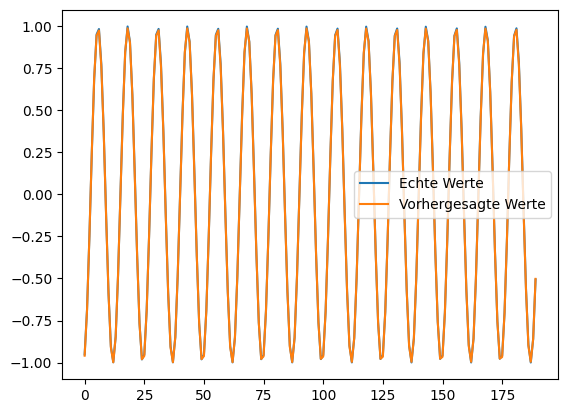

In [30]:
plt.plot(range(total_steps - seq_length), y_train, label="Echte Werte")
plt.plot(range(total_steps - seq_length), predicted, label="Vorhergesagte Werte")
plt.legend()
plt.show()


Die Grafik zeigt, dass das RNN die Sinuswelle nahezu exakt vorhersagt, was auf eine erfolgreiche Erfassung der zeitlichen Muster hinweist.